In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# Loading Full Year Load data
data = pd.read_csv('/content/full-year-load-data.csv')

In [ ]:
data

,date_column,value
0,2022-04-01 00:00:00,51.7800
1,2022-04-01 00:15:00,46.1600
2,2022-04-01 00:30:00,42.4200
3,2022-04-01 00:45:00,44.3300
4,2022-04-01 01:00:00,49.6700
...,...,...
37915,2023-04-30 22:45:00,66.2712
37916,2023-04-30 23:00:00,57.2260
37917,2023-04-30 23:15:00,53.8600
37918,2023-04-30 23:30:00,51.5604


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37920 entries, 0 to 37919
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_column  37920 non-null  object 
 1   value        37920 non-null  float64
dtypes: float64(1), object(1)
memory usage: 592.6+ KB


Since data has no null/missing entries with proper dtype, so no extra processing is required for data.

In [ ]:
data.date_column.nunique()

37920

Here date_column has all unique entries of time, so no extra processing is required for data.

In [ ]:
# Checking if any recorded load value is zero
zero_recorded = (data.value==0).any(axis=0)
print(zero_recorded)

False


Here result is false, so no ZERO load value is present.

In [ ]:
# Checking if any recorded load value is negative
negative_recorded = (data.value<0).any(axis=0)
print(negative_recorded)

False


Here also result is false, so no NEGATIVE value is present.

In [ ]:
# Converting the 'date_column' to datetime format
data['date_column'] = pd.to_datetime(data['date_column'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
# Setting the 'date_column' as the index
data.set_index('date_column', inplace=True)

In [ ]:
data.head()

,value
date_column,
2022-04-01 00:00:00,51.78
2022-04-01 00:15:00,46.16
2022-04-01 00:30:00,42.42
2022-04-01 00:45:00,44.33
2022-04-01 01:00:00,49.67


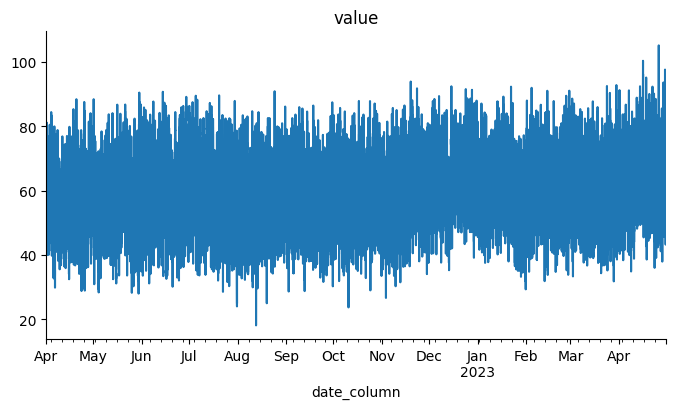

In [ ]:
# @title value

from matplotlib import pyplot as plt
data['value'].plot(kind='line', figsize=(8, 4), title='value')
plt.gca().spines[['top', 'right']].set_visible(False)

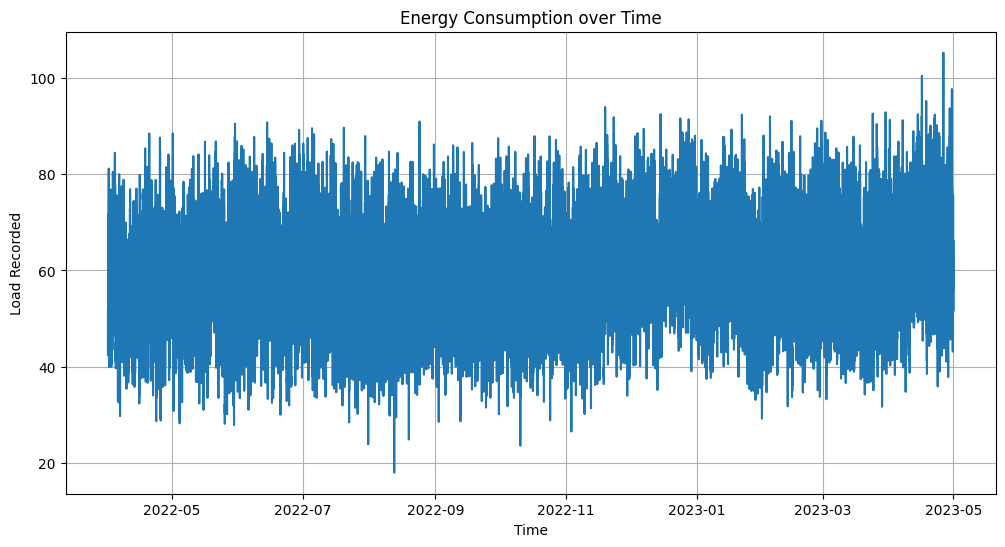

In [ ]:
# Visualizeing the Time Series Data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data.value)
plt.xlabel('Time')
plt.ylabel('Load Recorded')
plt.title('Energy Consumption over Time')
plt.grid(True)
plt.show()

Due to large data size the plot is not so clear. So, to effectively analyze the variation in energy consumption over time, we used alternative visualization methods.

In [ ]:
rolling_mean = data['value'].rolling(window=672).mean()
rolling_mean

date_column
2022-04-01 00:00:00          NaN
2022-04-01 00:15:00          NaN
2022-04-01 00:30:00          NaN
2022-04-01 00:45:00          NaN
2022-04-01 01:00:00          NaN
                         ...    
2023-04-30 22:45:00    62.500455
2023-04-30 23:00:00    62.493364
2023-04-30 23:15:00    62.481974
2023-04-30 23:30:00    62.468920
2023-04-30 23:45:00    62.473782
Name: value, Length: 37920, dtype: float64

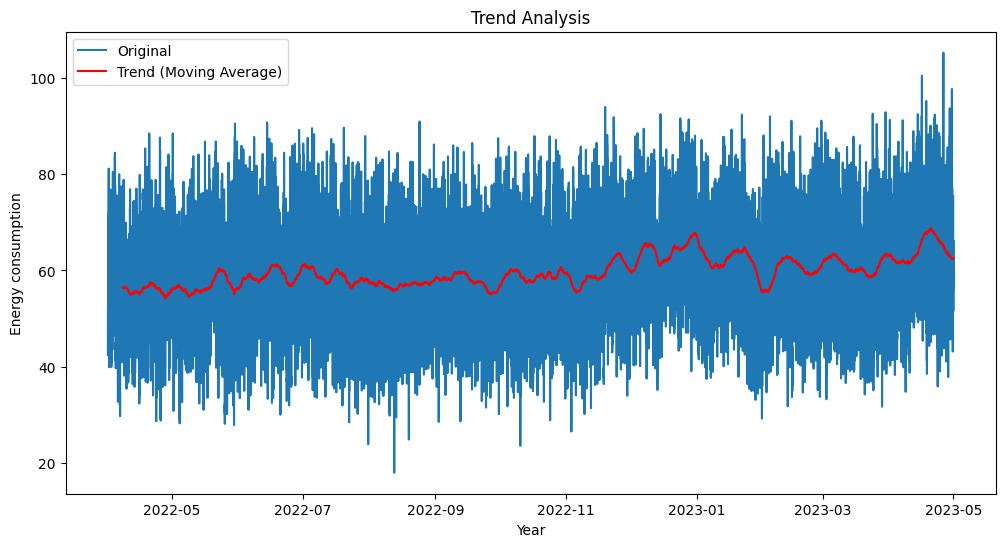

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value'], label='Original')
plt.plot(data.index, rolling_mean, color='red', label='Trend (Moving Average)')
plt.xlabel('Year')
plt.ylabel('Energy consumption')
plt.title('Trend Analysis')
plt.legend()
plt.show()

Plotting the moving average here can be a goog estimate for the trend component of our time series data, here as the moving average (red line) does not show any exponential increase or decrease, so our time series here does not have much influence of trend.

In [ ]:
ten_days = data.iloc[0:960]
ten_days

,value
date_column,
2022-04-01 00:00:00,51.78
2022-04-01 00:15:00,46.16
2022-04-01 00:30:00,42.42
2022-04-01 00:45:00,44.33
2022-04-01 01:00:00,49.67
...,...
2022-04-10 22:45:00,59.12
2022-04-10 23:00:00,57.08
2022-04-10 23:15:00,56.94


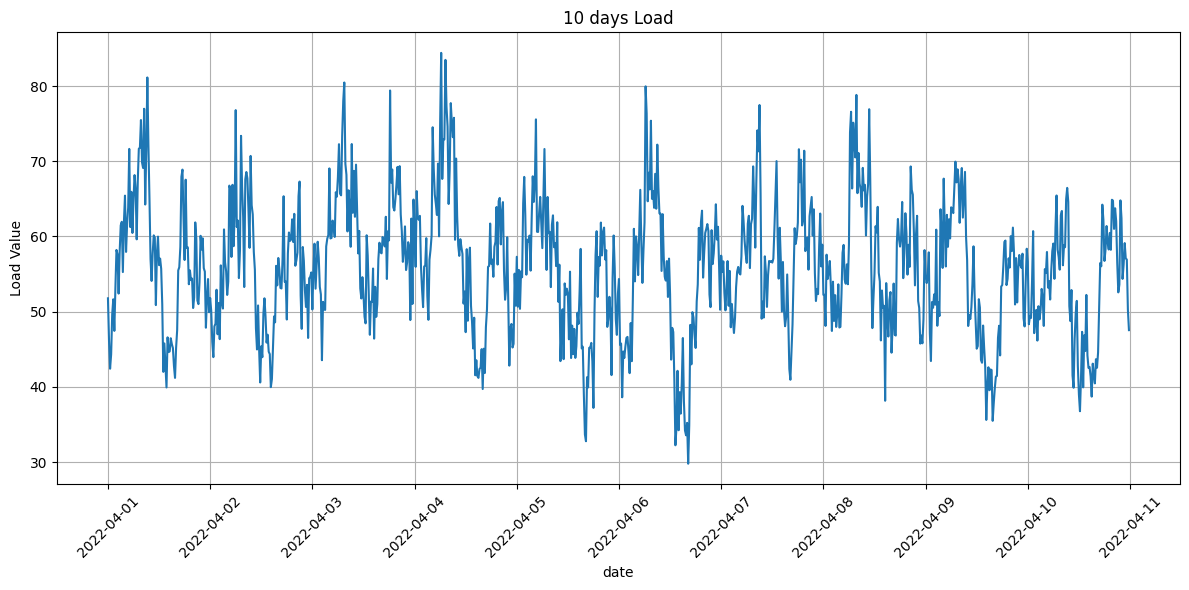

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(ten_days.index, ten_days['value'], linestyle='-')
plt.title('10 days Load')
plt.xlabel('date')
plt.ylabel('Load Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This is the plot for energy consumption data recorded over 10 consecutive days (subpart taken from original dataset). We can clearly see that the data is overall continuous and does not have great deviations from the overall mean but it has some kind of seasonal component as the plot displays some repetitive pattern over time.

In [ ]:
df = data.copy()

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.strftime('%b')
df['day'] = df.index.day
df['day_of_week'] = df.index.strftime('%a')
df['hour'] = df.index.hour
df

,value,year,month,day,day_of_week,hour
date_column,,,,,,
2022-04-01 00:00:00,51.7800,2022,Apr,1,Fri,0
2022-04-01 00:15:00,46.1600,2022,Apr,1,Fri,0
2022-04-01 00:30:00,42.4200,2022,Apr,1,Fri,0
2022-04-01 00:45:00,44.3300,2022,Apr,1,Fri,0
2022-04-01 01:00:00,49.6700,2022,Apr,1,Fri,1
...,...,...,...,...,...,...
2023-04-30 22:45:00,66.2712,2023,Apr,30,Sun,22
2023-04-30 23:00:00,57.2260,2023,Apr,30,Sun,23
2023-04-30 23:15:00,53.8600,2023,Apr,30,Sun,23


In [ ]:
month = 'Dec'
df2 = df[df.month==month]
df2 = df2[df2.day_of_week	== 'Tue']
df2

,value,year,month,day,day_of_week,hour
date_column,,,,,,
2022-12-06 00:00:00,63.81,2022,Dec,6,Tue,0
2022-12-06 00:15:00,65.78,2022,Dec,6,Tue,0
2022-12-06 00:30:00,68.80,2022,Dec,6,Tue,0
2022-12-06 00:45:00,75.18,2022,Dec,6,Tue,0
2022-12-06 01:00:00,69.75,2022,Dec,6,Tue,1
...,...,...,...,...,...,...
2022-12-27 22:45:00,68.62,2022,Dec,27,Tue,22
2022-12-27 23:00:00,72.11,2022,Dec,27,Tue,23
2022-12-27 23:15:00,70.73,2022,Dec,27,Tue,23


In [ ]:
df2.value.mean()

62.02138020833333

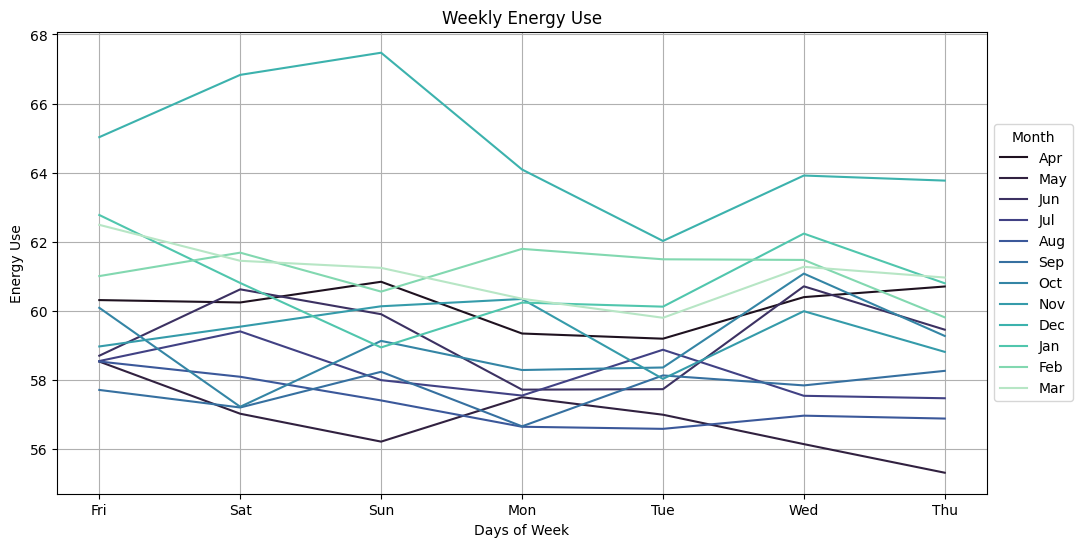

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(data=df, x='day_of_week', y='value', hue='month', palette='mako', ax=ax, errorbar= None)
months = [str(month) for month in df['month'].unique()]
legend_handles = lineplot.get_lines()
ax.legend(handles=legend_handles, labels=months, title='Month', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Weekly Energy Use')
ax.set_xlabel('Days of Week')
ax.set_ylabel('Energy Use')
ax.grid(True)
plt.plot();

Above displayed plot can help us in understanding the seasonal component of our time series data. We can here see that the Weekly pattern does not repeat over months. Also we can see that Winter Months (Nov/Dec) show here an extra demand compared to other months.
And also there's a weekend pattern that in most months, increase energy demand is recorded over weekends.

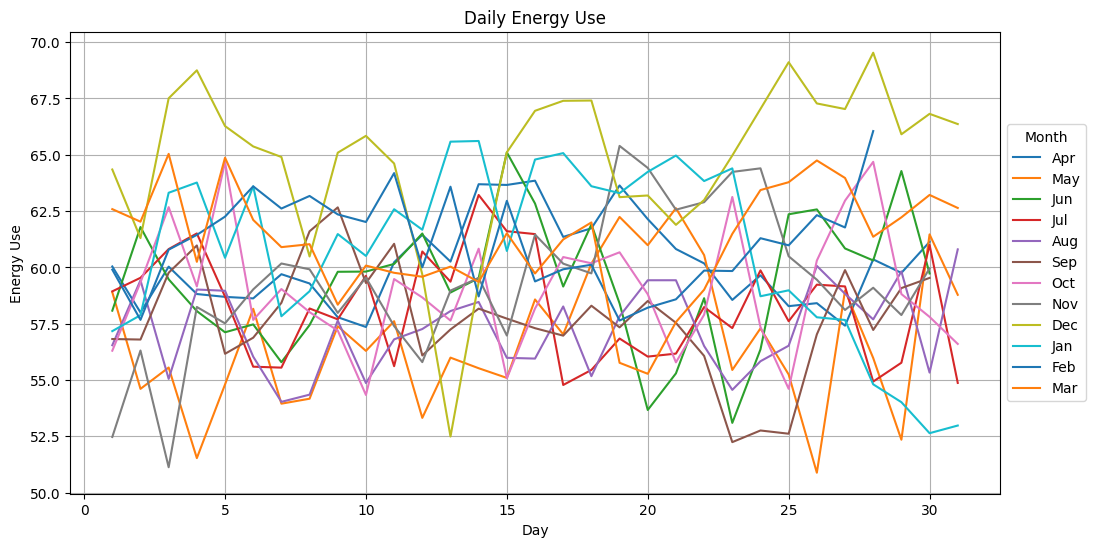

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(data=df, x='day', y='value', hue='month', palette='tab10', ax=ax, errorbar= None)
months = [str(month) for month in df['month'].unique()]
legend_handles = lineplot.get_lines()
ax.legend(handles=legend_handles, labels=months, title='Month', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Daily Energy Use')
ax.set_xlabel('Day')
ax.set_ylabel('Energy Use')
ax.grid(True)
plt.plot();

This plot is in continuation to seasonality analysis. Clearly they don't have any similarity in energy consumption pattern.Here the daywise energy conmsuption patterns are not similar for each month, but though its shows a pattern of exceptional energy demand in winter months (Dec, Jan, Feb).

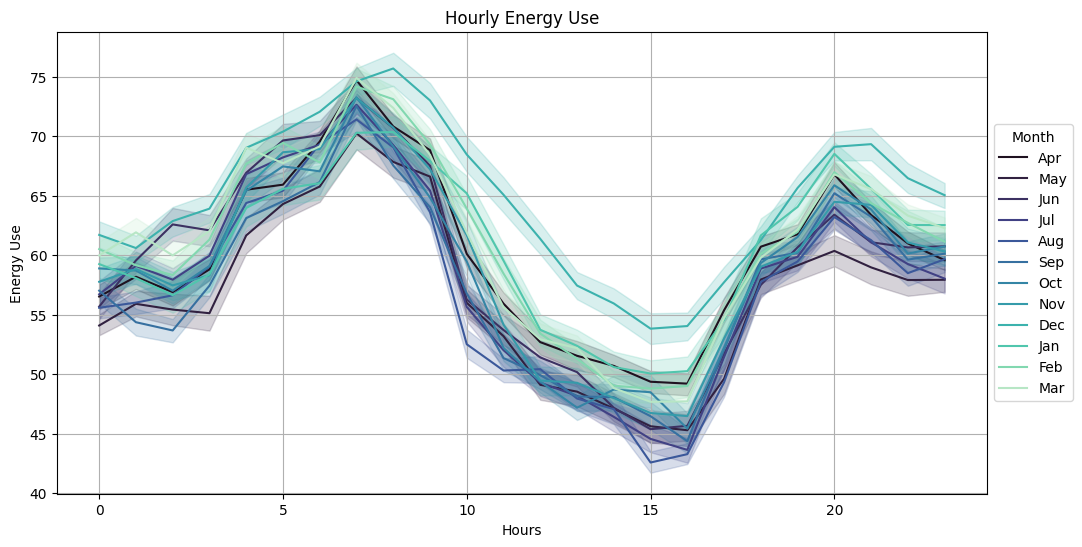

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(data=df, x='hour', y='value', hue='month', palette='mako', ax=ax)
months = [str(month) for month in df['month'].unique()]
legend_handles = lineplot.get_lines()
ax.legend(handles=legend_handles, labels=months, title='Month', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Hourly Energy Use')
ax.set_xlabel('Hours')
ax.set_ylabel('Energy Use')
ax.grid(True)
plt.plot();

Here's the Hourly energy consumption pattern. We can clearly see that over months, though energy demands changed but the overall pattern continued the same for each month.

Also we can see that in each month, maximum energy demands were recorded mostly during the morning (5-10 am) and night (after 20 pm).

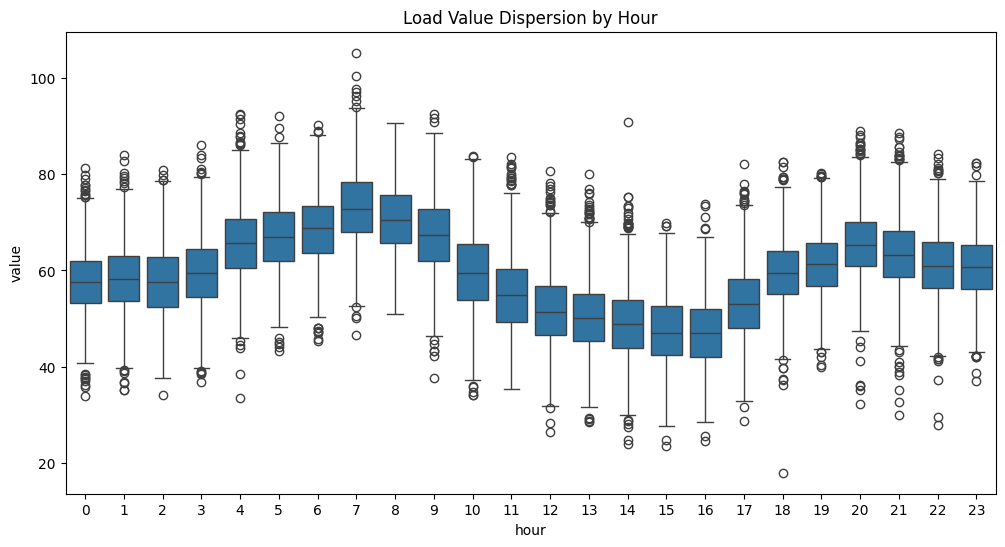

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='value')
ax.set_title('Load Value Dispersion by Hour')
plt.show()

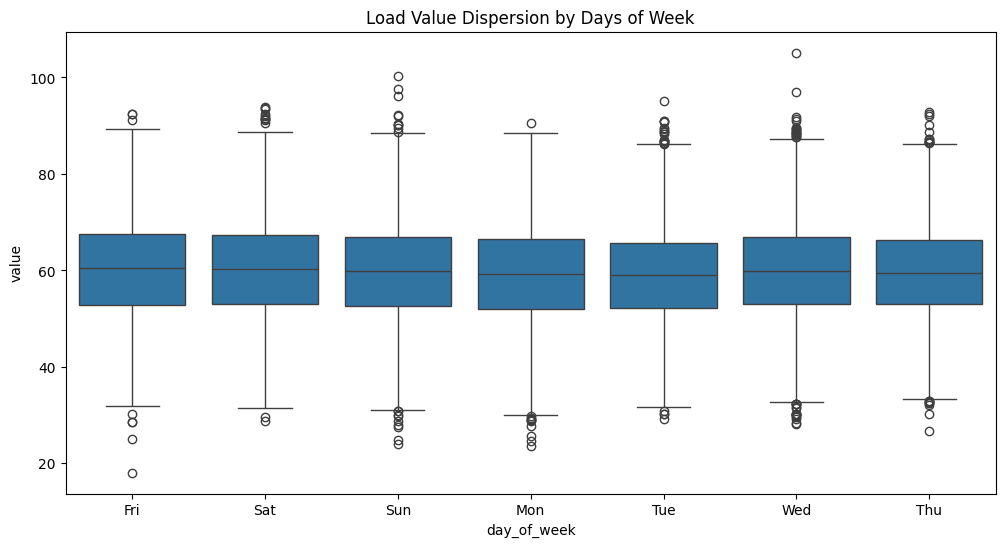

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='day_of_week', y='value')
ax.set_title('Load Value Dispersion by Days of Week')
plt.show()


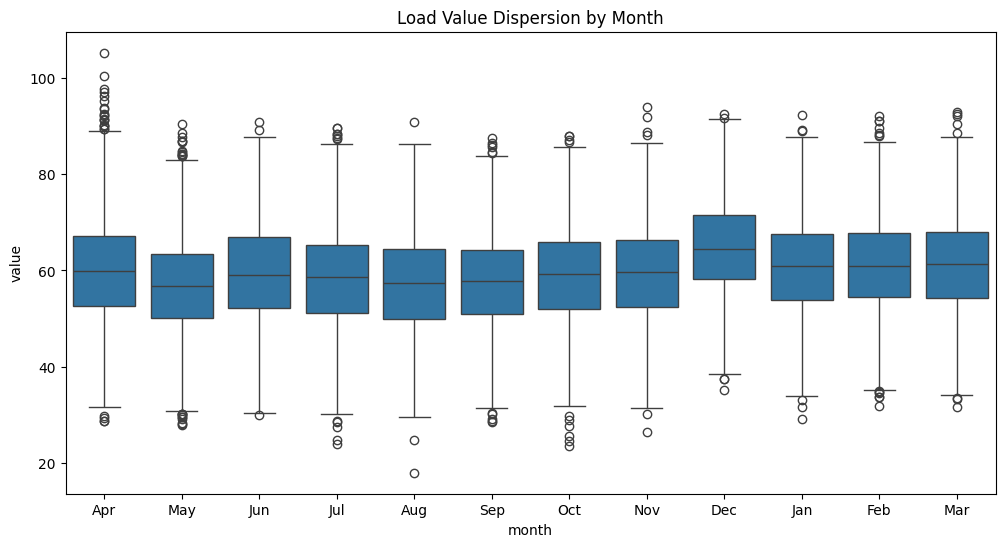

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='month', y='value')
ax.set_title('Load Value Dispersion by Month')
plt.show()

In [ ]:
# Checking for monthly averages
monthly_averages = data.resample('M').mean()
monthly_averages

,value
date_column,
2022-04-30,56.107368
2022-05-31,56.822345
2022-06-30,59.315472
2022-07-31,58.238380
2022-08-31,57.243589
2022-09-30,57.735507
2022-10-31,58.978303
2022-11-30,59.374539
2022-12-31,64.777732


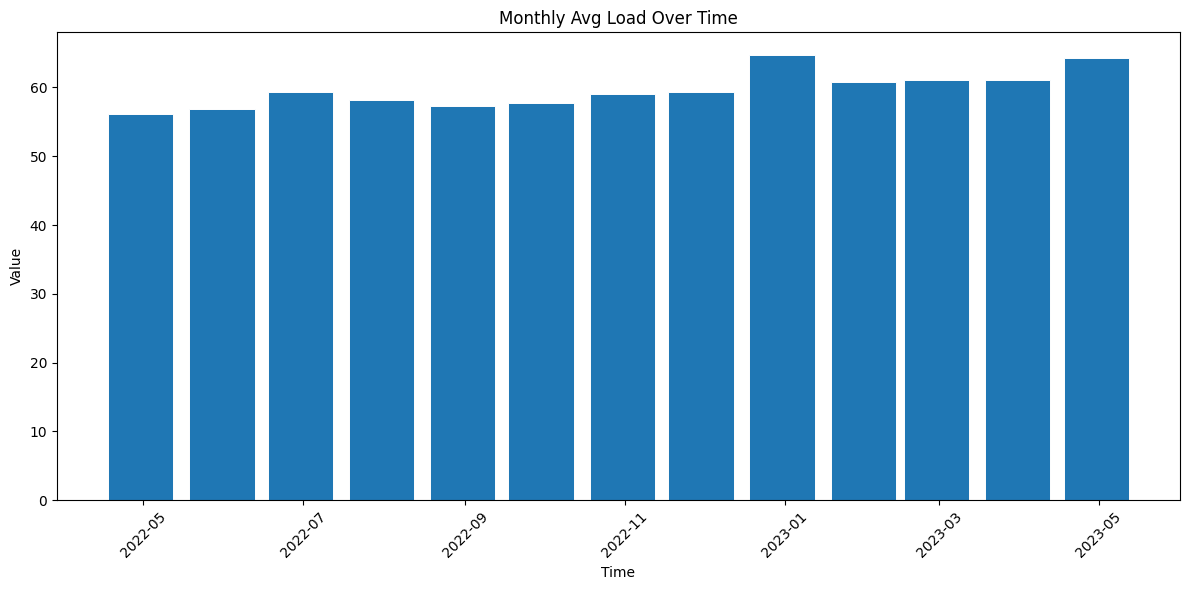

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_averages.index, monthly_averages['value'],  width=25, edgecolor="white", linewidth=0.7)
plt.title('Monthly Avg Load Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

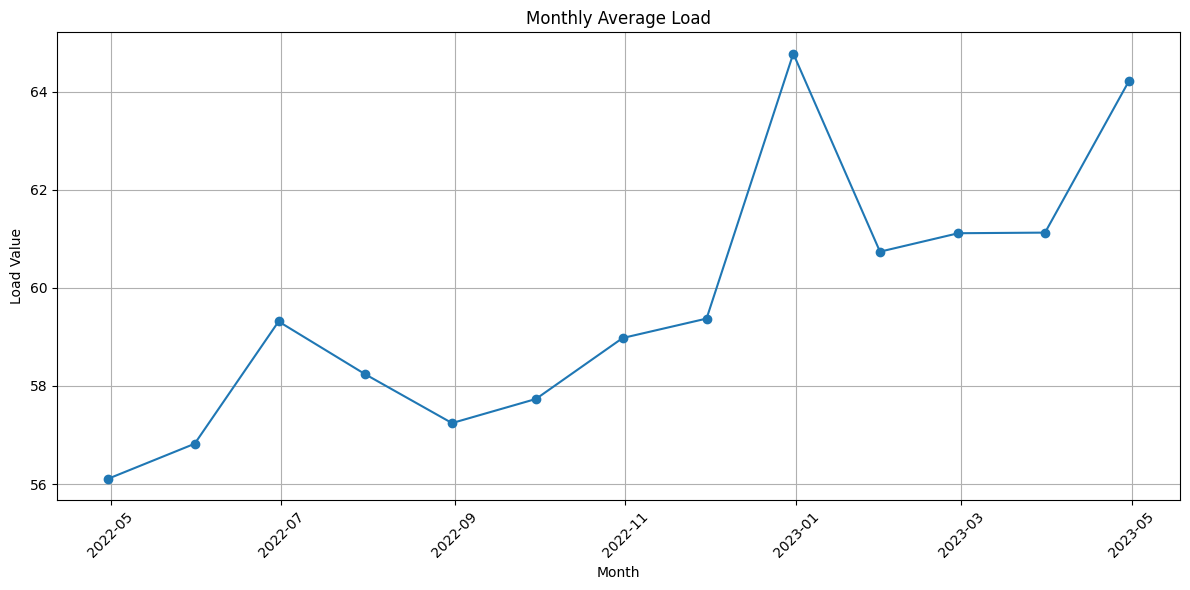

In [ ]:
# Plotting monthly average load value
plt.figure(figsize=(12, 6))
plt.plot(monthly_averages.index, monthly_averages['value'], marker='o', linestyle='-')
plt.title('Monthly Average Load')
plt.xlabel('Month')
plt.ylabel('Load Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

as we plot the change in monthly averages over time, we clearly see that the average has gone up by the end of year especially the peak occurs in winter months, this we have already seen in previous plots also.

In [ ]:
# Extracting the week number from the dates
df['weekofyear'] = df.index.isocalendar().week

In [ ]:
df.head()

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-04-01 00:00:00,51.78,2022,Apr,1,Fri,0,13
2022-04-01 00:15:00,46.16,2022,Apr,1,Fri,0,13
2022-04-01 00:30:00,42.42,2022,Apr,1,Fri,0,13
2022-04-01 00:45:00,44.33,2022,Apr,1,Fri,0,13
2022-04-01 01:00:00,49.67,2022,Apr,1,Fri,1,13


Now we'll try analyzing the weekly pattern in a month if there is any.

In [ ]:
# Considering a particular month
month = 'Apr'
df_filtered = df.loc[df['month'] == month]
df_filtered

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-04-01 00:00:00,51.7800,2022,Apr,1,Fri,0,13
2022-04-01 00:15:00,46.1600,2022,Apr,1,Fri,0,13
2022-04-01 00:30:00,42.4200,2022,Apr,1,Fri,0,13
2022-04-01 00:45:00,44.3300,2022,Apr,1,Fri,0,13
2022-04-01 01:00:00,49.6700,2022,Apr,1,Fri,1,13
...,...,...,...,...,...,...,...
2023-04-30 22:45:00,66.2712,2023,Apr,30,Sun,22,17
2023-04-30 23:00:00,57.2260,2023,Apr,30,Sun,23,17
2023-04-30 23:15:00,53.8600,2023,Apr,30,Sun,23,17


We have selected data values for only April month for our analysis. Now we will convert weekofyear entries(that show week number of a year) to week number of month for easier understanding.

In [ ]:
def week_to_string(week):
    if week == 13:
        return 'first week'
    elif week == 14:
        return 'second week'
    elif week == 15:
        return 'third week'
    elif week == 16:
        return 'fourth week'
    elif week == 17:
        return 'last week'
    else:
        return f'{week}th week'

# Apply the function to the 'week_of_year' column
df_filtered['week_num'] = df_filtered['weekofyear'].apply(week_to_string)
df_filtered.head()

<ipython-input-33-7ade7a5cbca1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['week_num'] = df_filtered['weekofyear'].apply(week_to_string)


,value,year,month,day,day_of_week,hour,weekofyear,week_num
date_column,,,,,,,,
2022-04-01 00:00:00,51.78,2022,Apr,1,Fri,0,13,first week
2022-04-01 00:15:00,46.16,2022,Apr,1,Fri,0,13,first week
2022-04-01 00:30:00,42.42,2022,Apr,1,Fri,0,13,first week
2022-04-01 00:45:00,44.33,2022,Apr,1,Fri,0,13,first week
2022-04-01 01:00:00,49.67,2022,Apr,1,Fri,1,13,first week


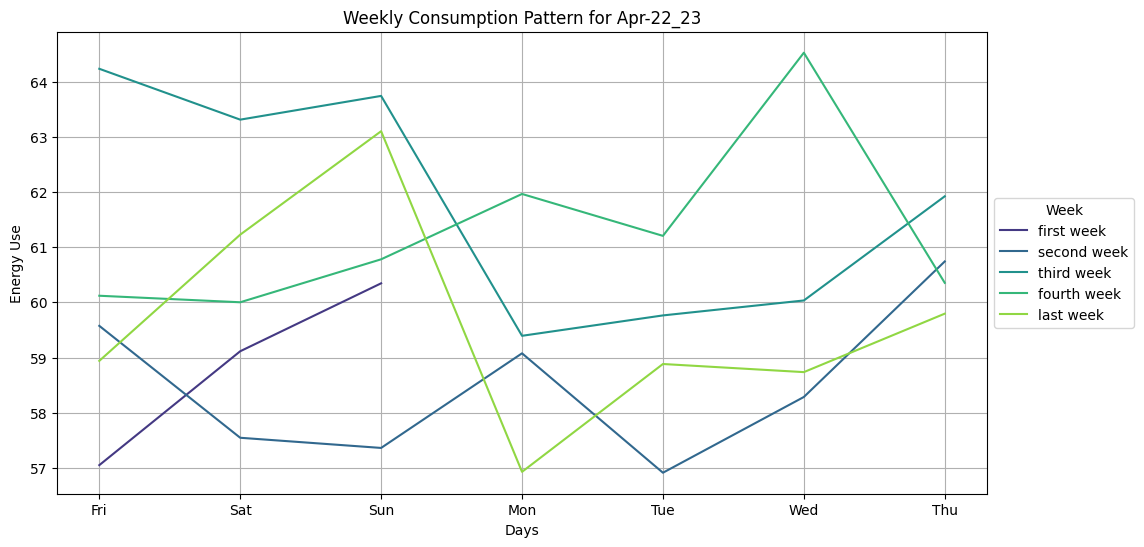

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(data=df_filtered, x='day_of_week', y='value', hue='week_num', palette='viridis', ax=ax, errorbar = None)
Week = [str(week_num) for week_num in df_filtered['week_num'].unique()]
legend_handles = lineplot.get_lines()
ax.legend(handles=legend_handles, labels=Week, title='Week', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Weekly Consumption Pattern for Apr-22_23')
ax.set_xlabel('Days')
ax.set_ylabel('Energy Use')
ax.grid(True)
plt.plot();

This plot shows the weekly patterns for the month of april year 2022 and 2023. We can see that over weekends the energy demand has significant rise here.

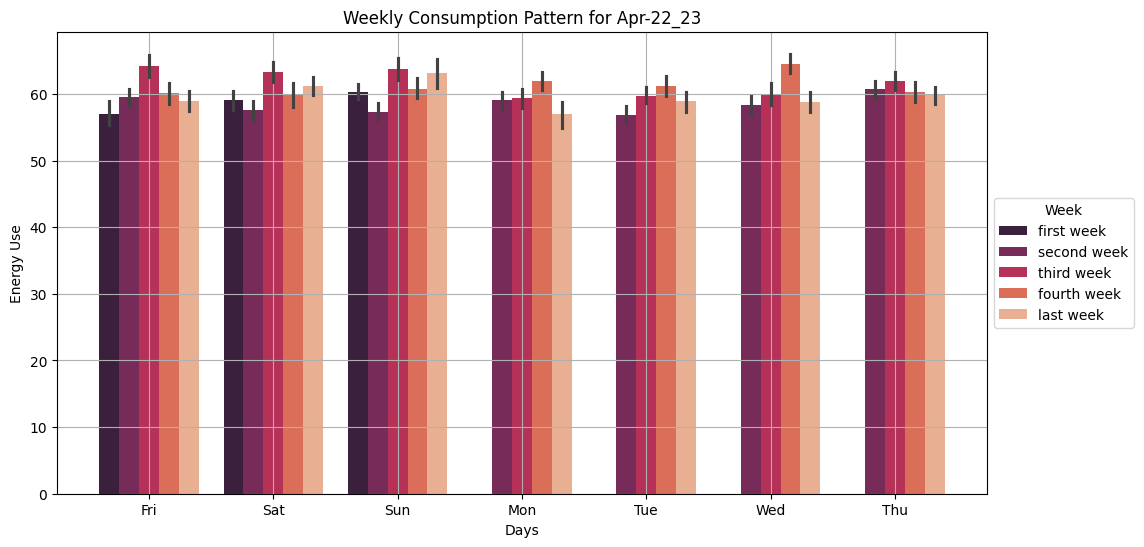

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.barplot(data=df_filtered, x='day_of_week', y='value', hue='week_num', palette='rocket', ax=ax)
Week = [str(week_num) for week_num in df_filtered['week_num'].unique()]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Week', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Weekly Consumption Pattern for Apr-22_23')
ax.set_xlabel('Days')
ax.set_ylabel('Energy Use')
ax.grid(True)
plt.plot();

This plot will make our inferences even more clear.

In [ ]:
# Considering a particular month
month = 'May'
df1 = df.loc[df['month'] == month]
df1

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-05-01 00:00:00,45.92,2022,May,1,Sun,0,17
2022-05-01 00:15:00,53.78,2022,May,1,Sun,0,17
2022-05-01 00:30:00,55.03,2022,May,1,Sun,0,17
2022-05-01 00:45:00,60.13,2022,May,1,Sun,0,17
2022-05-01 01:00:00,55.68,2022,May,1,Sun,1,17
...,...,...,...,...,...,...,...
2022-05-31 22:45:00,57.40,2022,May,31,Tue,22,22
2022-05-31 23:00:00,54.67,2022,May,31,Tue,23,22
2022-05-31 23:15:00,54.07,2022,May,31,Tue,23,22


In [ ]:
def week_to_string1(week):
    if week == 17:
        return 'first week'
    elif week == 18:
        return 'second week'
    elif week == 19:
        return 'third week'
    elif week == 20:
        return 'fourth week'
    elif week == 21:
        return 'fifth week'
    else:
        return 'last week'

# Apply the function to the 'week_of_year' column
df1['week_num'] = df1['weekofyear'].apply(week_to_string1)
df1.head()

<ipython-input-37-482c2f7635de>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['week_num'] = df1['weekofyear'].apply(week_to_string1)


,value,year,month,day,day_of_week,hour,weekofyear,week_num
date_column,,,,,,,,
2022-05-01 00:00:00,45.92,2022,May,1,Sun,0,17,first week
2022-05-01 00:15:00,53.78,2022,May,1,Sun,0,17,first week
2022-05-01 00:30:00,55.03,2022,May,1,Sun,0,17,first week
2022-05-01 00:45:00,60.13,2022,May,1,Sun,0,17,first week
2022-05-01 01:00:00,55.68,2022,May,1,Sun,1,17,first week


In [ ]:
df1.tail()

,value,year,month,day,day_of_week,hour,weekofyear,week_num
date_column,,,,,,,,
2022-05-31 22:45:00,57.40,2022,May,31,Tue,22,22,last week
2022-05-31 23:00:00,54.67,2022,May,31,Tue,23,22,last week
2022-05-31 23:15:00,54.07,2022,May,31,Tue,23,22,last week
2022-05-31 23:30:00,66.88,2022,May,31,Tue,23,22,last week
2022-05-31 23:45:00,61.04,2022,May,31,Tue,23,22,last week


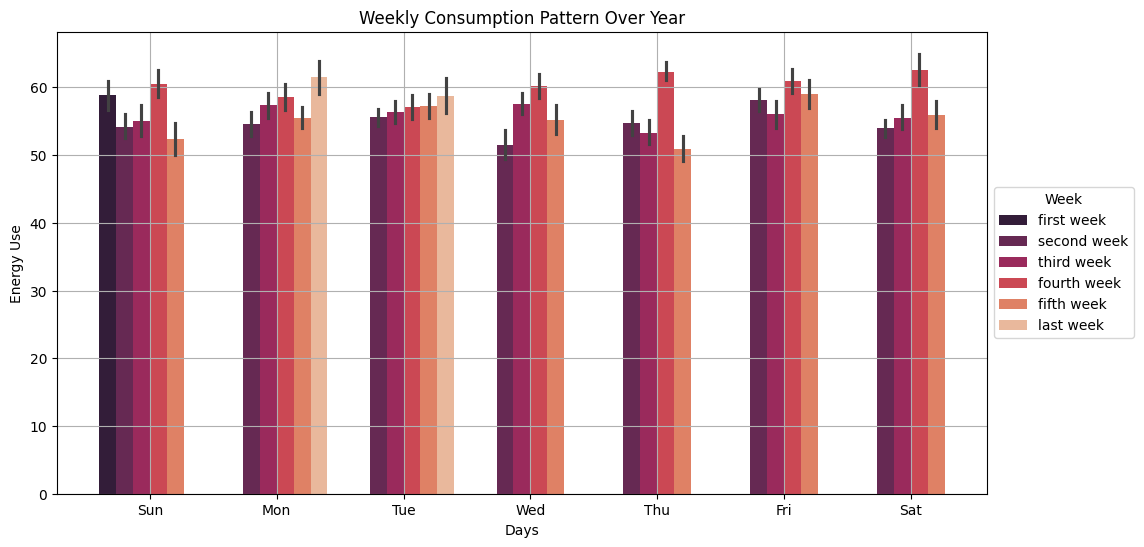

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.barplot(data=df1, x='day_of_week', y='value', hue='week_num', palette='rocket', ax=ax)
Week = [str(week_num) for week_num in df_filtered['week_num'].unique()]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Week', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Weekly Consumption Pattern Over Year')
ax.set_xlabel('Days')
ax.set_ylabel('Energy Use')
ax.grid(True)
plt.plot();

In [ ]:
# Calculating the weekly average for load value
weekly_average = data.resample('W').mean()
print("Weekly Average Load Value:")
(weekly_average)

Weekly Average Load Value:


,value
date_column,
2022-04-03,57.380382
2022-04-10,55.336205
2022-04-17,56.417693
2022-04-24,56.284390
2022-05-01,56.244420
2022-05-08,54.682902
2022-05-15,55.889107
2022-05-22,60.310521
2022-05-29,55.166607


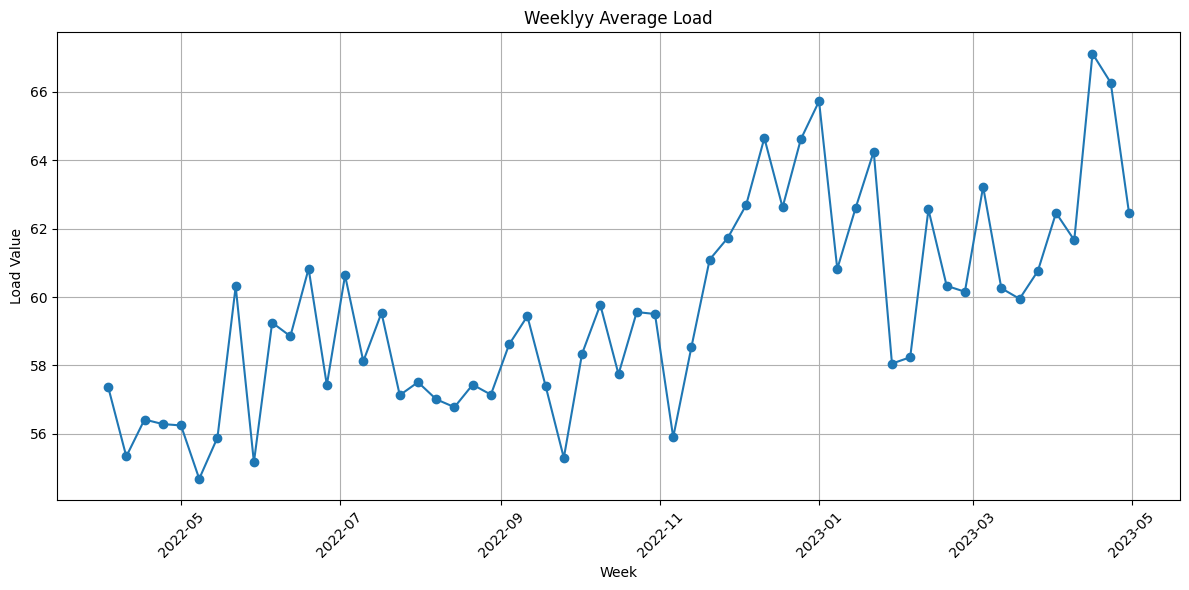

In [ ]:
# Plotting weekly average load value
plt.figure(figsize=(12, 6))
plt.plot(weekly_average.index, weekly_average['value'], marker='o', linestyle='-')
plt.title('Weeklyy Average Load')
plt.xlabel('Week')
plt.ylabel('Load Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-04-01 00:00:00,51.7800,2022,Apr,1,Fri,0,13
2022-04-01 00:15:00,46.1600,2022,Apr,1,Fri,0,13
2022-04-01 00:30:00,42.4200,2022,Apr,1,Fri,0,13
2022-04-01 00:45:00,44.3300,2022,Apr,1,Fri,0,13
2022-04-01 01:00:00,49.6700,2022,Apr,1,Fri,1,13
...,...,...,...,...,...,...,...
2023-04-30 22:45:00,66.2712,2023,Apr,30,Sun,22,17
2023-04-30 23:00:00,57.2260,2023,Apr,30,Sun,23,17
2023-04-30 23:15:00,53.8600,2023,Apr,30,Sun,23,17


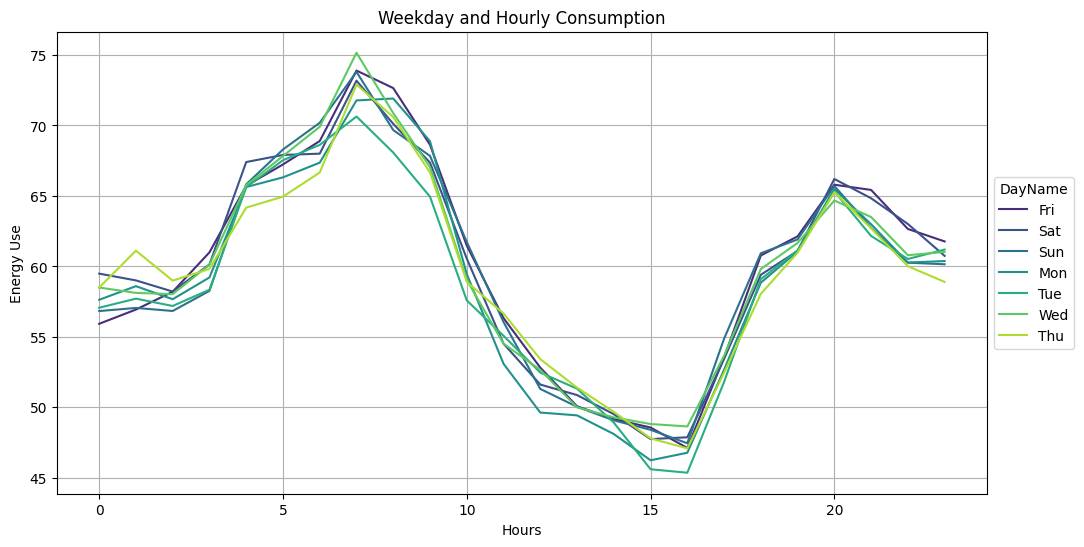

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(data=df, x='hour', y='value', hue='day_of_week', palette='viridis', ax=ax, errorbar = None)
dayname = [str(day) for day in df['day_of_week'].unique()]
legend_handles = lineplot.get_lines()
ax.legend(handles=legend_handles, labels=dayname, title='DayName', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Weekday and Hourly Consumption')
ax.set_xlabel('Hours')
ax.set_ylabel('Energy Use')
ax.grid(True)
plt.plot();

In [ ]:
# Considering a particular month
month = 'Dec'
df_1= df.loc[df['month'] == month]
df_1

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-12-01 00:00:00,59.63,2022,Dec,1,Thu,0,48
2022-12-01 00:15:00,62.19,2022,Dec,1,Thu,0,48
2022-12-01 00:30:00,62.48,2022,Dec,1,Thu,0,48
2022-12-01 00:45:00,58.96,2022,Dec,1,Thu,0,48
2022-12-01 01:00:00,65.77,2022,Dec,1,Thu,1,48
...,...,...,...,...,...,...,...
2022-12-31 22:45:00,70.19,2022,Dec,31,Sat,22,52
2022-12-31 23:00:00,69.52,2022,Dec,31,Sat,23,52
2022-12-31 23:15:00,58.47,2022,Dec,31,Sat,23,52


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2976 entries, 2022-12-01 00:00:00 to 2022-12-31 23:45:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   value        2976 non-null   float64
 1   year         2976 non-null   int32  
 2   month        2976 non-null   object 
 3   day          2976 non-null   int32  
 4   day_of_week  2976 non-null   object 
 5   hour         2976 non-null   int32  
 6   weekofyear   2976 non-null   UInt32 
dtypes: UInt32(1), float64(1), int32(3), object(2)
memory usage: 142.4+ KB


In [ ]:
df_2 = df_1[df_1.day==1]
df_2

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-12-01 00:00:00,59.63,2022,Dec,1,Thu,0,48
2022-12-01 00:15:00,62.19,2022,Dec,1,Thu,0,48
2022-12-01 00:30:00,62.48,2022,Dec,1,Thu,0,48
2022-12-01 00:45:00,58.96,2022,Dec,1,Thu,0,48
2022-12-01 01:00:00,65.77,2022,Dec,1,Thu,1,48
...,...,...,...,...,...,...,...
2022-12-01 22:45:00,68.55,2022,Dec,1,Thu,22,48
2022-12-01 23:00:00,63.36,2022,Dec,1,Thu,23,48
2022-12-01 23:15:00,63.20,2022,Dec,1,Thu,23,48


In [ ]:
df_2.value.max()

80.51

In [ ]:
df_1 = df_1.resample('D').max()
df_1

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-12-01,80.51,2022,Dec,1,Thu,23,48
2022-12-02,78.73,2022,Dec,2,Fri,23,48
2022-12-03,87.85,2022,Dec,3,Sat,23,48
2022-12-04,88.49,2022,Dec,4,Sun,23,48
2022-12-05,85.02,2022,Dec,5,Mon,23,49
2022-12-06,83.52,2022,Dec,6,Tue,23,49
2022-12-07,89.39,2022,Dec,7,Wed,23,49
2022-12-08,80.18,2022,Dec,8,Thu,23,49
2022-12-09,83.42,2022,Dec,9,Fri,23,49


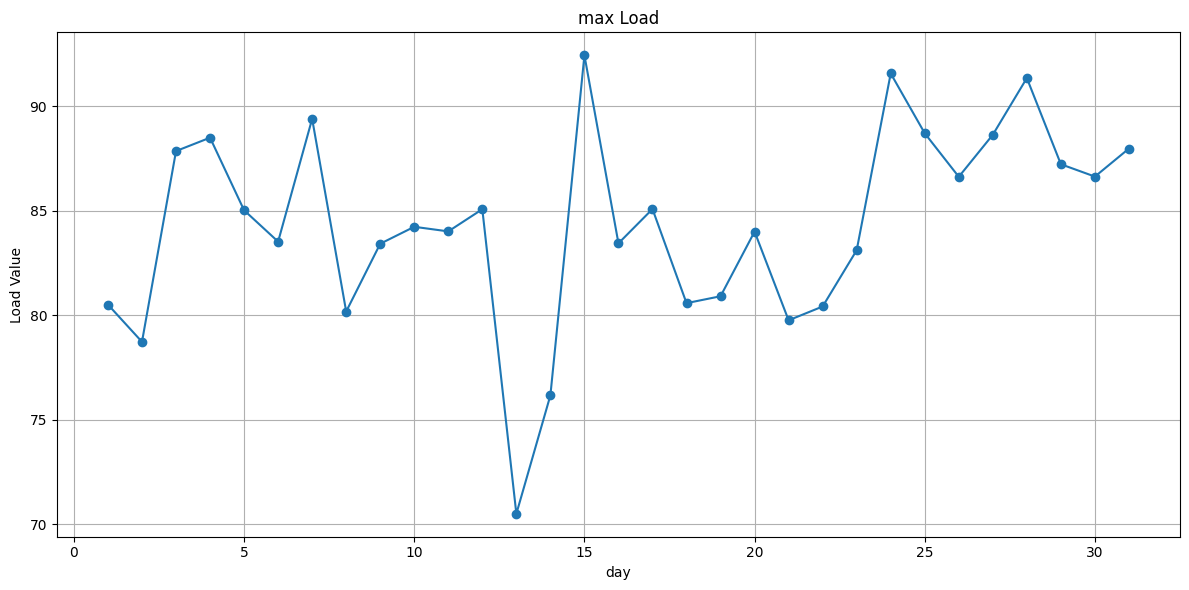

In [ ]:
# Plotting weekly average load value
plt.figure(figsize=(12, 6))
plt.plot(df_1.day, df_1['value'], marker='o', linestyle='-')
plt.title('max Load')
plt.xlabel('day')
plt.ylabel('Load Value')
plt.grid(True)
plt.tight_layout()
plt.show()

Extracting the daily maximum energy consumption values recorded.

In [ ]:
df3=df.resample('D').max()
df3

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-04-01,81.1400,2022,Apr,1,Fri,23,13
2022-04-02,76.8000,2022,Apr,2,Sat,23,13
2022-04-03,80.4700,2022,Apr,3,Sun,23,13
2022-04-04,84.4100,2022,Apr,4,Mon,23,14
2022-04-05,75.5700,2022,Apr,5,Tue,23,14
...,...,...,...,...,...,...,...
2023-04-26,105.1620,2023,Apr,26,Wed,23,17
2023-04-27,81.8780,2023,Apr,27,Thu,23,17
2023-04-28,85.5460,2023,Apr,28,Fri,23,17


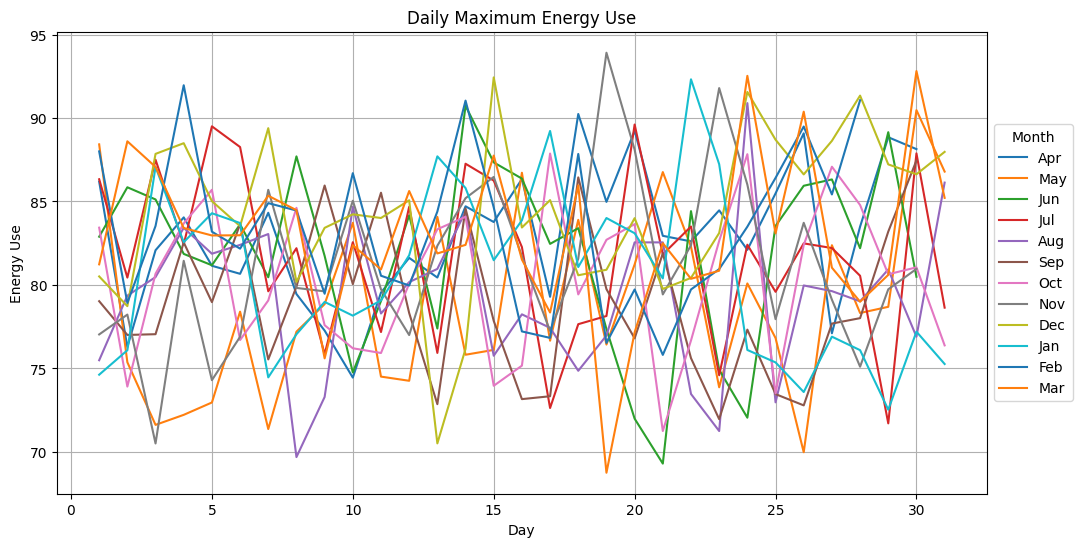

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(data=df3, x='day', y='value', hue='month', palette='tab10', ax=ax, errorbar= None)
months = [str(month) for month in df['month'].unique()]
legend_handles = lineplot.get_lines()
ax.legend(handles=legend_handles, labels=months, title='Month', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Daily Maximum Energy Use')
ax.set_xlabel('Day')
ax.set_ylabel('Energy Use')
ax.grid(True)
plt.plot();

These plots do not have any similarities in patterns. We can not make obtain any solid inference from these plots.

For checking the similarities between the values that occured on days of week to other days of week in a complete year, we'll try plotting the CORRELATION MATRIX for this.

In [ ]:
df4=df.copy()
df4

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-04-01 00:00:00,51.7800,2022,Apr,1,Fri,0,13
2022-04-01 00:15:00,46.1600,2022,Apr,1,Fri,0,13
2022-04-01 00:30:00,42.4200,2022,Apr,1,Fri,0,13
2022-04-01 00:45:00,44.3300,2022,Apr,1,Fri,0,13
2022-04-01 01:00:00,49.6700,2022,Apr,1,Fri,1,13
...,...,...,...,...,...,...,...
2023-04-30 22:45:00,66.2712,2023,Apr,30,Sun,22,17
2023-04-30 23:00:00,57.2260,2023,Apr,30,Sun,23,17
2023-04-30 23:15:00,53.8600,2023,Apr,30,Sun,23,17


In [ ]:
df5=df4[df4.weekofyear==13]
df5=df5[df5.day_of_week=='Mon']
df5

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2023-03-27 00:00:00,55.6088,2023,Mar,27,Mon,0,13
2023-03-27 00:15:00,53.6600,2023,Mar,27,Mon,0,13
2023-03-27 00:30:00,64.6736,2023,Mar,27,Mon,0,13
2023-03-27 00:45:00,64.7784,2023,Mar,27,Mon,0,13
2023-03-27 01:00:00,69.0248,2023,Mar,27,Mon,1,13
...,...,...,...,...,...,...,...
2023-03-27 22:45:00,70.8364,2023,Mar,27,Mon,22,13
2023-03-27 23:00:00,68.4888,2023,Mar,27,Mon,23,13
2023-03-27 23:15:00,69.5740,2023,Mar,27,Mon,23,13


In [ ]:
df5.day_of_week.unique()

array(['Mon'], dtype=object)

In [ ]:
df4.weekofyear.nunique()

52

In [ ]:
df4.weekofyear.unique()

<IntegerArray>
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
 51, 52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]
Length: 52, dtype: UInt32

In [ ]:
def weekwisedayavg(df, week, day):
  df1 = df[df.weekofyear==week]
  df1 = df1[df1.day_of_week==day]
  return df1['value'].mean()

sun=[]
mon=[]
tue=[]
wed=[]
thu=[]
fri=[]
sat=[]

for week in range(52):
  sun.append(weekwisedayavg(df4, week+1,'Sun'))
  mon.append(weekwisedayavg(df4, week+1, 'Mon'))
  tue.append(weekwisedayavg(df4, week+1, 'Tue'))
  wed.append(weekwisedayavg(df4, week+1, 'Wed'))
  thu.append(weekwisedayavg(df4, week+1, 'Thu'))
  fri.append(weekwisedayavg(df4, week+1, 'Fri'))
  sat.append(weekwisedayavg(df4, week+1, 'Sat'))

print(sun)

[58.94284166666667, 60.730275000000006, 63.83424583333334, 54.016333333333336, 62.25457083333333, 60.002424999999995, 57.64149166666667, 62.32038333333333, 64.87045833333333, 59.58472499999999, 55.7648625, 64.74790833333334, 60.345258333333334, 57.363795833333334, 63.73933125, 60.78005833333333, 60.999608333333335, 54.17010416666667, 55.094166666666666, 60.54572916666666, 52.34958333333333, 57.11989583333334, 61.504687499999996, 58.40354166666666, 62.57500000000001, 60.813229166666666, 59.6253125, 54.78000000000001, 59.86875, 54.87229166666666, 54.03072916666667, 58.465624999999996, 59.42958333333333, 57.6909375, 60.97367499999999, 61.047716666666666, 58.29871666666667, 52.6155, 59.33506666666667, 57.197075000000005, 58.174783333333345, 63.12780833333333, 57.80361666666666, 59.023225000000004, 58.96953333333334, 64.41767083333333, 58.1106, 68.74968750000001, 64.61385416666666, 67.40927083333334, 69.10968749999999, 57.171175]


In [ ]:
weekwisedayavg(df4, 13,'Mon')

63.97092083333334

In [ ]:
len(sun)

52

In [ ]:
len(mon)

52

In [ ]:
data_struc = {
    'Sunday': sun,
    'Monday': mon,
    'Tuesday': tue,
    'Wednesday': wed,
    'Thursday': thu,
    'Friday': fri,
    'Saturday': sat
}
df5 = pd.DataFrame(data_struc)
df5

,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,58.942842,57.878683,63.314446,63.767746,60.426075,63.599921,57.831275
1,60.730275,61.480388,60.509617,62.582583,61.672792,65.582646,65.612558
2,63.834246,64.788942,65.074388,63.604433,63.297717,64.241987,64.966662
3,54.016333,64.397100,58.718971,58.982696,57.785479,57.665254,54.808592
4,62.254571,52.639392,52.979096,59.900317,57.671379,60.787279,61.443833
5,60.002425,63.599592,62.613537,63.172196,62.352571,62.016229,64.187033
6,57.641492,63.582954,58.710625,62.955737,59.377463,59.917338,60.117517
7,62.320383,58.212458,58.583333,59.859262,59.838525,61.296112,60.980762
8,64.870458,61.772762,66.053071,62.586917,62.030088,65.040596,60.247971
9,59.584725,62.108425,60.899854,61.030608,58.343621,60.081792,59.760454


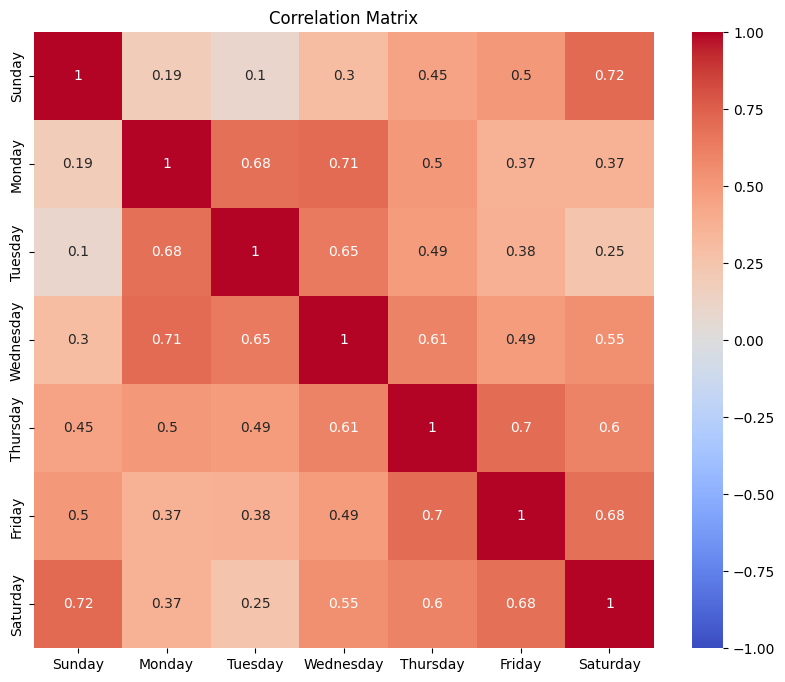

In [ ]:
correlation_matrix = df5.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Here, we can clearly see the correlation between the recorded energy consumption value over days of week. A pattern that can be observed here is that the consumption values recorded on a certain day more or less greatly correlated with the days in close vicinity rather than far away days. For example, here we can see that weekend values like on Sunday is more correlated with weekend day like Saturday while week days like Mon, Tue etc are closely correlated with closer week days rather than weekend days.

Now, to find any such correlation between the values recorded over months, we'll try plotting correlation matrix for Monthly data.

In [ ]:
df6=df4[df4.month==2]
df6=df6[df6.day==30]
df6['value'].mean()

nan

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37920 entries, 2022-04-01 00:00:00 to 2023-04-30 23:45:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   value        37920 non-null  float64
 1   year         37920 non-null  int32  
 2   month        37920 non-null  object 
 3   day          37920 non-null  int32  
 4   day_of_week  37920 non-null  object 
 5   hour         37920 non-null  int32  
 6   weekofyear   37920 non-null  UInt32 
dtypes: UInt32(1), float64(1), int32(3), object(2)
memory usage: 1.8+ MB


In [ ]:
month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Apply the mapping to the 'month' column
df4.month = df4['month'].map(month_mapping)
df4

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-04-01 00:00:00,51.7800,2022,4,1,Fri,0,13
2022-04-01 00:15:00,46.1600,2022,4,1,Fri,0,13
2022-04-01 00:30:00,42.4200,2022,4,1,Fri,0,13
2022-04-01 00:45:00,44.3300,2022,4,1,Fri,0,13
2022-04-01 01:00:00,49.6700,2022,4,1,Fri,1,13
...,...,...,...,...,...,...,...
2023-04-30 22:45:00,66.2712,2023,4,30,Sun,22,17
2023-04-30 23:00:00,57.2260,2023,4,30,Sun,23,17
2023-04-30 23:15:00,53.8600,2023,4,30,Sun,23,17


In [ ]:
def monthwisedayavg(df, month, day):
  df1 = df[df.month==month]
  df1 = df1[df1.day==day]
  return df1['value'].mean()

jan=[]
feb=[]
mar=[]
apr=[]
may=[]
jun=[]
jul=[]
aug=[]
sep=[]
oct=[]
nov=[]
dec=[]

for month in range(12):
  for day in range(31):
    if month==0:
      jan.append(monthwisedayavg(df4, month+1, day+1))
    elif month==1:
      feb.append(monthwisedayavg(df4, month+1, day+1))
    elif month==2:
      mar.append(monthwisedayavg(df4, month+1, day+1))
    elif month==3:
      apr.append(monthwisedayavg(df4, month+1, day+1))
    elif month==4:
      may.append(monthwisedayavg(df4, month+1, day+1))
    elif month==5:
      jun.append(monthwisedayavg(df4, month+1, day+1))
    elif month==6:
      jul.append(monthwisedayavg(df4, month+1, day+1))
    elif month==7:
      aug.append(monthwisedayavg(df4, month+1, day+1))
    elif month==8:
      sep.append(monthwisedayavg(df4, month+1, day+1))
    elif month==9:
      oct.append(monthwisedayavg(df4, month+1, day+1))
    elif month==10:
      nov.append(monthwisedayavg(df4, month+1, day+1))
    else:
      dec.append(monthwisedayavg(df4, month+1, day+1))

In [ ]:
jan

[57.171175,
 57.878683333333335,
 63.31444583333333,
 63.76774583333333,
 60.426075,
 63.59992083333333,
 57.831275000000005,
 58.94284166666667,
 61.480387500000006,
 60.509616666666666,
 62.58258333333333,
 61.67279166666666,
 65.58264583333333,
 65.61255833333333,
 60.730275000000006,
 64.78894166666667,
 65.0743875,
 63.60443333333333,
 63.297716666666666,
 64.2419875,
 64.9666625,
 63.83424583333334,
 64.39710000000001,
 58.71897083333332,
 58.98269583333333,
 57.78547916666667,
 57.66525416666667,
 54.80859166666667,
 54.016333333333336,
 52.639391666666675,
 52.97909583333333]

In [ ]:
len(jan)

31

In [ ]:
feb

[59.90031666666666,
 57.67137916666667,
 60.78727916666666,
 61.44383333333334,
 62.25457083333333,
 63.59959166666666,
 62.6135375,
 63.17219583333334,
 62.352570833333345,
 62.01622916666667,
 64.18703333333333,
 60.002424999999995,
 63.58295416666667,
 58.710625,
 62.95573749999999,
 59.3774625,
 59.9173375,
 60.11751666666666,
 57.64149166666667,
 58.21245833333332,
 58.583333333333336,
 59.8592625,
 59.838525,
 61.29611249999999,
 60.9807625,
 62.32038333333333,
 61.77276249999999,
 66.05307083333334,
 nan,
 nan,
 nan]

In [ ]:
len(feb)

31

In [ ]:
data_struc = {
    'January': jan,
    'February': feb,
    'March': mar,
    'April': apr,
    'May': may,
    'June': jun,
    'July': jul,
    'August': aug,
    'September': sep,
    'October': oct,
    'November': nov,
    'December': dec
}
df7 = pd.DataFrame(data_struc)
df7

,January,February,March,April,May,June,July,August,September,October,November,December
0,57.171175,59.900317,62.586917,60.041613,58.899063,58.079583,58.936146,56.544896,56.820400,56.301950,52.471783,64.346250
1,57.878683,57.671379,62.030088,57.999373,54.607604,61.792708,59.537917,59.426042,56.797117,59.335067,56.309346,61.300729
2,63.314446,60.787279,65.040596,60.033348,55.554688,59.470521,60.813229,55.050521,59.764038,62.675329,51.127304,67.508333
3,63.767746,61.443833,60.247971,58.817990,51.533125,58.059896,61.508437,59.018021,60.973675,59.156888,58.242850,68.749688
4,60.426075,62.254571,64.870458,58.691502,54.802708,57.119896,58.704583,58.962917,56.164317,64.663533,57.516008,66.274479
5,63.599921,63.599592,62.108425,58.624190,58.162396,57.469479,55.591771,56.036458,56.879346,57.669892,59.023225,65.370729
6,57.831275,62.613537,60.899854,59.697940,53.949688,55.792083,55.550208,54.030729,58.426637,59.039200,60.173225,64.901979
7,58.942842,63.172196,61.030608,59.286819,54.170104,57.440000,58.176667,54.350625,61.603121,58.014121,59.915175,60.485417
8,61.480388,62.352571,58.343621,57.788171,57.387708,59.805313,57.694688,57.638750,62.664658,57.197075,57.979608,65.092604
9,60.509617,62.016229,60.081792,57.354671,56.294167,59.814688,59.625312,54.865417,59.306846,54.336204,59.548350,65.840521


In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   January    31 non-null     float64
 1   February   28 non-null     float64
 2   March      31 non-null     float64
 3   April      30 non-null     float64
 4   May        31 non-null     float64
 5   June       30 non-null     float64
 6   July       31 non-null     float64
 7   August     31 non-null     float64
 8   September  30 non-null     float64
 9   October    31 non-null     float64
 10  November   30 non-null     float64
 11  December   31 non-null     float64
dtypes: float64(12)
memory usage: 3.0 KB


In [ ]:
df7 = df7.dropna()

In [ ]:
df7

,January,February,March,April,May,June,July,August,September,October,November,December
0,57.171175,59.900317,62.586917,60.041613,58.899063,58.079583,58.936146,56.544896,56.820400,56.301950,52.471783,64.346250
1,57.878683,57.671379,62.030088,57.999373,54.607604,61.792708,59.537917,59.426042,56.797117,59.335067,56.309346,61.300729
2,63.314446,60.787279,65.040596,60.033348,55.554688,59.470521,60.813229,55.050521,59.764038,62.675329,51.127304,67.508333
3,63.767746,61.443833,60.247971,58.817990,51.533125,58.059896,61.508437,59.018021,60.973675,59.156888,58.242850,68.749688
4,60.426075,62.254571,64.870458,58.691502,54.802708,57.119896,58.704583,58.962917,56.164317,64.663533,57.516008,66.274479
5,63.599921,63.599592,62.108425,58.624190,58.162396,57.469479,55.591771,56.036458,56.879346,57.669892,59.023225,65.370729
6,57.831275,62.613537,60.899854,59.697940,53.949688,55.792083,55.550208,54.030729,58.426637,59.039200,60.173225,64.901979
7,58.942842,63.172196,61.030608,59.286819,54.170104,57.440000,58.176667,54.350625,61.603121,58.014121,59.915175,60.485417
8,61.480388,62.352571,58.343621,57.788171,57.387708,59.805313,57.694688,57.638750,62.664658,57.197075,57.979608,65.092604
9,60.509617,62.016229,60.081792,57.354671,56.294167,59.814688,59.625312,54.865417,59.306846,54.336204,59.548350,65.840521


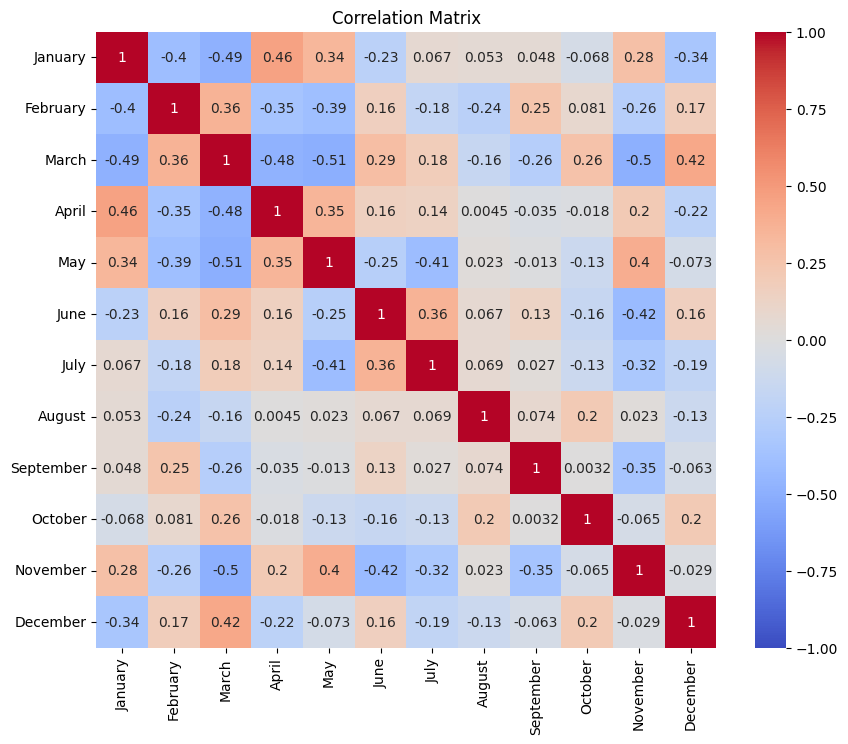

In [ ]:
correlation_matrix = df7.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Here Months Correlation matrix does not seem give any crucial information. As we can see that here recorded values are very less correlated with values recorded in other months.

In [ ]:
df8 = df4.copy()
df8.head()

,value,year,month,day,day_of_week,hour,weekofyear
date_column,,,,,,,
2022-04-01 00:00:00,51.78,2022,4,1,Fri,0,13
2022-04-01 00:15:00,46.16,2022,4,1,Fri,0,13
2022-04-01 00:30:00,42.42,2022,4,1,Fri,0,13
2022-04-01 00:45:00,44.33,2022,4,1,Fri,0,13
2022-04-01 01:00:00,49.67,2022,4,1,Fri,1,13


In [ ]:
daily_range = df8.resample('D').max().value - df8.resample('D').min().value
df9 = pd.DataFrame(daily_range)
df9

,value
date_column,
2022-04-01,41.2100
2022-04-02,36.8300
2022-04-03,36.9200
2022-04-04,44.6900
2022-04-05,42.7900
...,...
2023-04-26,61.3080
2023-04-27,40.7784
2023-04-28,47.6528


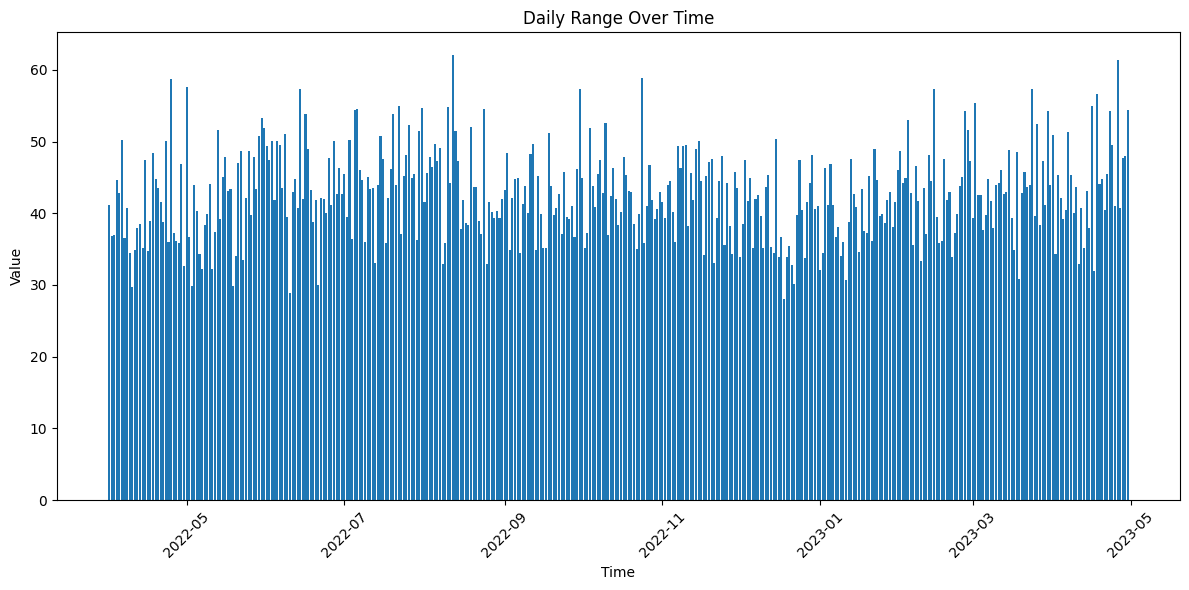

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df9.index, df9['value'])
plt.title('Daily Range Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

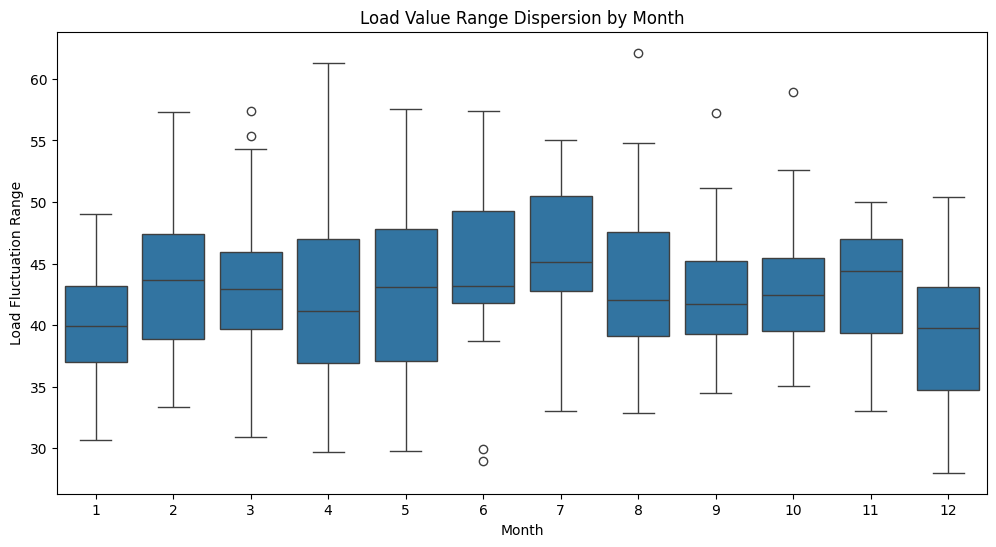

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df9, x=df9.index.month, y='value')
ax.set_title('Load Value Range Dispersion by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Load Fluctuation Range')
plt.show()

It looks like the fluctuations are periodic. But the hypothesis still needs to be tested with sufficient data.

In [ ]:
df9.head()

,value
date_column,
2022-04-01,41.21
2022-04-02,36.83
2022-04-03,36.92
2022-04-04,44.69
2022-04-05,42.79


In [ ]:
df9['year'] = df9.index.year
df9['month'] = df9.index.strftime('%b')
df9['day'] = df9.index.day
df9['day_of_week'] = df9.index.strftime('%a')
df9['hour'] = df9.index.hour
df9

,value,year,month,day,day_of_week,hour
date_column,,,,,,
2022-04-01,41.2100,2022,Apr,1,Fri,0
2022-04-02,36.8300,2022,Apr,2,Sat,0
2022-04-03,36.9200,2022,Apr,3,Sun,0
2022-04-04,44.6900,2022,Apr,4,Mon,0
2022-04-05,42.7900,2022,Apr,5,Tue,0
...,...,...,...,...,...,...
2023-04-26,61.3080,2023,Apr,26,Wed,0
2023-04-27,40.7784,2023,Apr,27,Thu,0
2023-04-28,47.6528,2023,Apr,28,Fri,0


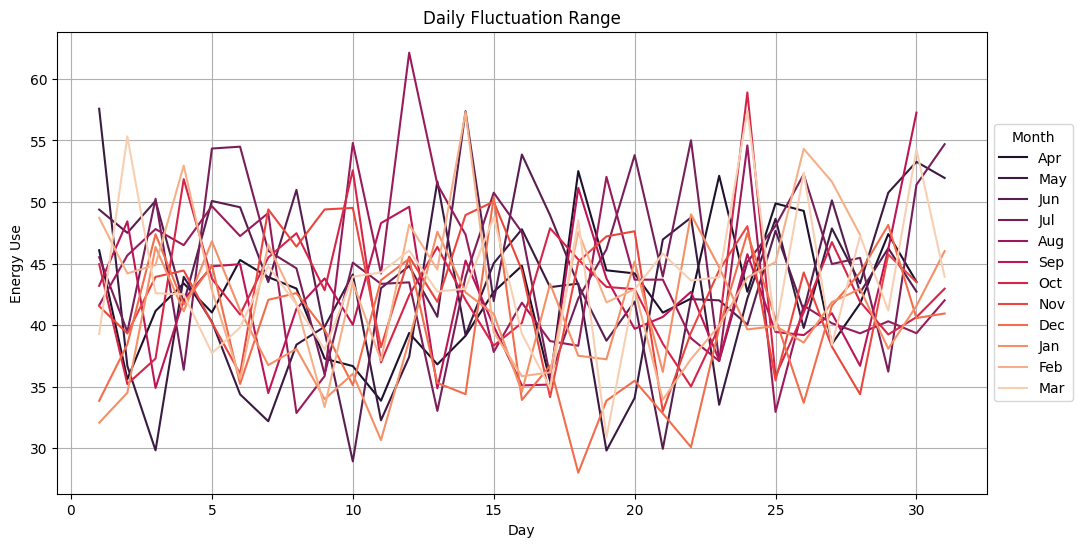

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(data=df9, x='day', y='value', hue='month', palette='rocket', ax=ax, errorbar= None)
months = [str(month) for month in df['month'].unique()]
legend_handles = lineplot.get_lines()
ax.legend(handles=legend_handles, labels=months, title='Month', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Daily Fluctuation Range')
ax.set_xlabel('Day')
ax.set_ylabel('Energy Use')
ax.grid(True)
plt.plot();

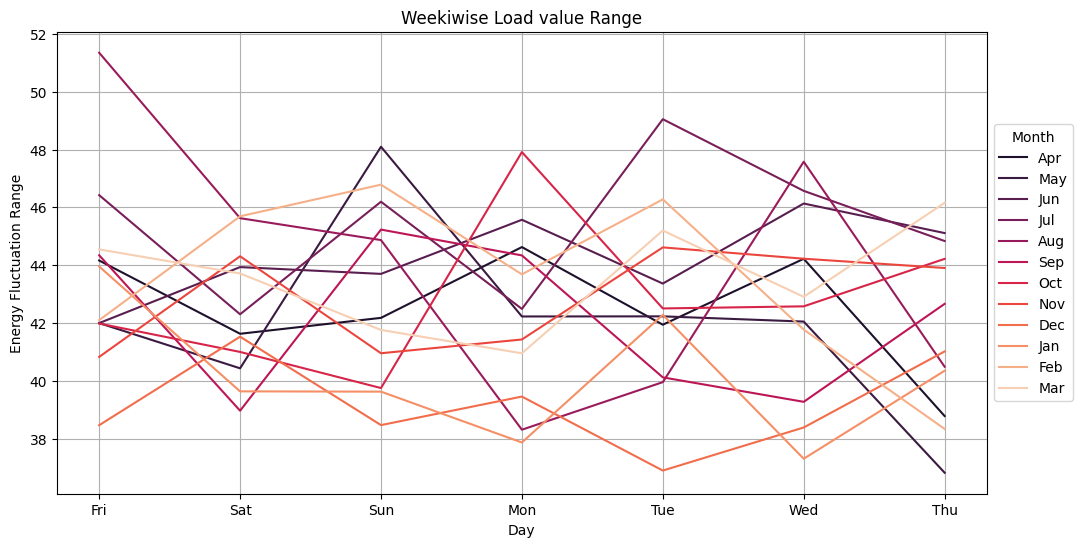

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(data=df9, x='day_of_week', y='value', hue='month', palette='rocket', ax=ax, errorbar= None)
months = [str(month) for month in df['month'].unique()]
legend_handles = lineplot.get_lines()
ax.legend(handles=legend_handles, labels=months, title='Month', loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Weekiwise Load value Range')
ax.set_xlabel('Day')
ax.set_ylabel('Energy Fluctuation Range')
ax.grid(True)
plt.plot();